# Customer Analysis | 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import skew

import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Read the three files into python as dataframes
df1 = pd.read_csv('/Users/mmacor/Desktop/IronHack/Unit_1/Week_1/Lesson_3_pandas/lab-customer-analysis-round-1/files_for_lab/csv_files/file1.csv')
df2 = pd.read_csv('/Users/mmacor/Desktop/IronHack/Unit_1/Week_1/Lesson_3_pandas/lab-customer-analysis-round-1/files_for_lab/csv_files/file2.csv')
df3 = pd.read_csv('/Users/mmacor/Desktop/IronHack/Unit_1/Week_1/Lesson_3_pandas/lab-customer-analysis-round-1/files_for_lab/csv_files/file3.csv')

In [3]:
# Show the DataFrame's shape.
print('df1 shape: ', df1.shape)
print('df2 shape: ', df2.shape)
print('df3 shape: ', df3.shape)

df1 shape:  (4008, 11)
df2 shape:  (996, 11)
df3 shape:  (7070, 11)


In [4]:
# Standardize header names.
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')
df3.columns = df3.columns.str.lower().str.replace(' ', '_')

In [5]:
# Rearrange the columns in the dataframe as needed - setting 'customer' as index
df1.set_index('customer')
df2.set_index('customer')
df3.set_index('customer')

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class
customer,,,,,,,,,,
SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car


In [6]:
# Rearrange the columns in the dataframe as needed
# Dropped 'st'
cols1 = list(df1.columns.values)
cols2 = list(df2.columns.values)
cols3 = list(df3.columns.values)

df1 = df1[['customer', 'gender', 'education', 'customer_lifetime_value', 'income', 'monthly_premium_auto', 'number_of_open_complaints', 'policy_type', 'vehicle_class', 'total_claim_amount']]
df2 = df2[['customer', 'gender', 'education', 'customer_lifetime_value', 'income', 'monthly_premium_auto', 'number_of_open_complaints', 'policy_type', 'vehicle_class', 'total_claim_amount']]
df3 = df3[['customer', 'gender', 'education', 'customer_lifetime_value', 'income', 'monthly_premium_auto', 'number_of_open_complaints', 'policy_type', 'vehicle_class', 'total_claim_amount']]


In [7]:
# Concatenate the three dataframes (axis=1 => concat horizontally)
data = pd.concat([df1, df2, df3])
data.shape

(12074, 10)

In [8]:
# Which columns are numerical?
numerical_cols = list(data.select_dtypes(np.number))
numerical_cols

['income', 'monthly_premium_auto', 'total_claim_amount']

In [9]:
# Which columns are categorical?
categorical_cols = list(data.select_dtypes('object'))
categorical_cols

['customer',
 'gender',
 'education',
 'customer_lifetime_value',
 'number_of_open_complaints',
 'policy_type',
 'vehicle_class']

In [10]:
cols = list(data.columns.values)
cols

['customer',
 'gender',
 'education',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'number_of_open_complaints',
 'policy_type',
 'vehicle_class',
 'total_claim_amount']

In [11]:
# Understand the meaning of all columns

# customer: customer_ID
# gender: gender
# education: education degree
# customer_lifetime_value: the total amount of money a customer is expected to spend with your business, 
    # or on your products, during the lifetime of an average business relationship.
# income: income
# monthly_premium_auto: the amount the customer pays monthly for the insurance
# number_of_open_complaints: Complaints against insurance
# policy_type: type of insurance
# vehicle class: vehicle type
# total_claim_amount: Total the customer can claim in case of accident

#### Perform the data cleaning operations mentioned so far in class

In [12]:
# Delete the column education and the number of open complaints from the dataframe.
data = data.drop(['education', 'number_of_open_complaints'], axis=1)
data.head(3)

,customer,gender,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount
0,RB50392,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,F,697953.59%,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,F,1288743.17%,48767.0,108.0,Personal Auto,Two-Door Car,566.472247


In [13]:
# Correct the values in the column customer lifetime value. They are given as a percent, so multiply 
# them by 100 and change dtype to numerical type.

# Column is made of objects
data['customer_lifetime_value'] = pd.to_numeric(data['customer_lifetime_value'].str.replace('%', '')) * 100

In [14]:
# Check for duplicate rows in the data and remove if any.
data = data.drop_duplicates(keep='first')
data.shape

(9131, 8)

In [15]:
# Filter out the data for customers who have an income of 0 or less
data = data.loc[(data['income'] > 0)]
data.shape

(6837, 8)

# Customer Analysis | 2

In [16]:
df = pd.read_csv('/Users/mmacor/Desktop/IronHack/Unit_1/Week_2/Lesson_1/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
df.head(2)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN


In [17]:
# Show DF shape
df.shape

(10910, 26)

In [18]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(2)

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN


In [19]:
df = df.drop(['unnamed:_0'], axis = 1)
df.shape

(10910, 25)

In [20]:
# Find numerical data
numerical_df = df.select_dtypes(np.number)
numerical_df.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331


In [21]:
# Find Categorical data
categorical_df = df.select_dtypes('object')
categorical_df.head(2)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN


### Checking and dealing with NaN values

In [22]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [23]:
# Creating a list with only numerical values, to plot them afterwards
cols_with_nans = []
for col in df.columns:
    if df[col].isna().sum().any() and col in df.select_dtypes(include=np.number).columns.tolist():
        cols_with_nans.append(col)
        
print(cols_with_nans)

['months_since_last_claim', 'number_of_open_complaints']


/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


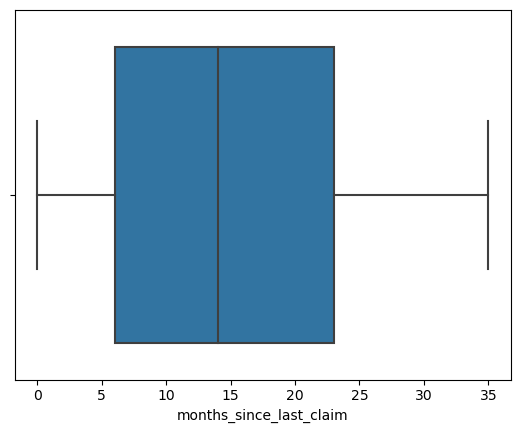

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


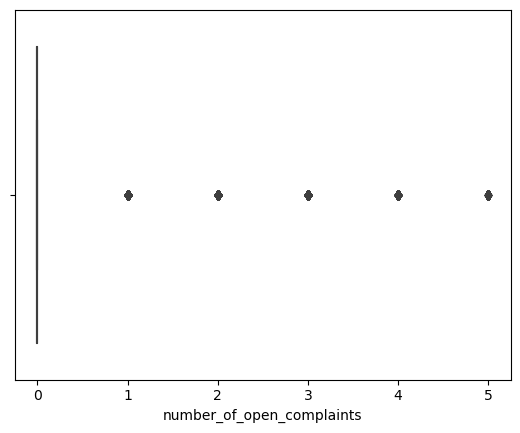

In [24]:
for col in df[cols_with_nans]:
    sns.boxplot(df[col])
    plt.show()

In [25]:
# Finding the means
mean_months = df['months_since_last_claim'].mean()
mean_nr_complaints = df['number_of_open_complaints'].mean()

In [26]:
# Replacing NaNs with the means
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(mean_months)
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(mean_nr_complaints)

df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

#### Now the categoricals

In [27]:
# Finding categoricals with NaNs
categoricals_with_nans = []
for col in df.columns:
    if df[col].isna().sum().any() and col in df.select_dtypes('object').columns.tolist():
        categoricals_with_nans.append(col)
        
print(categoricals_with_nans)

['state', 'response', 'vehicle_class', 'vehicle_size', 'vehicle_type']


In [28]:
# Filling NaNs with most frequent values
for col in df[categoricals_with_nans]:
    df[col] = df[col].fillna(df[col].mode()[0])

In [29]:
# Double-checking again for NaNs - none!
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [30]:
# Extract months from dataset and save them in separate column; filter to display only first quarter (Jan, Feb, March)
df['month'] = pd.to_datetime(df['effective_to_date']).dt.month

# Filter df to display only info about the 1st quarter (Jan, Feb, March)
df[df['month'] <= 3]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [31]:
# Still create function performing all that before


# Customer Analysis | 3

## EDA

In [32]:
# show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [33]:
# Describe DF
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


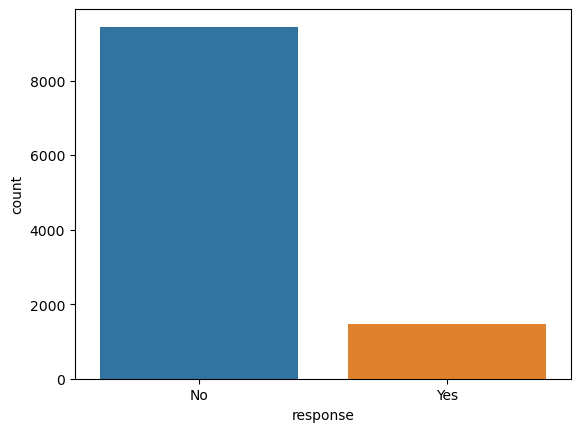

In [34]:
# Show a plot of total number of responses
sns.countplot(df['response'])
plt.show()

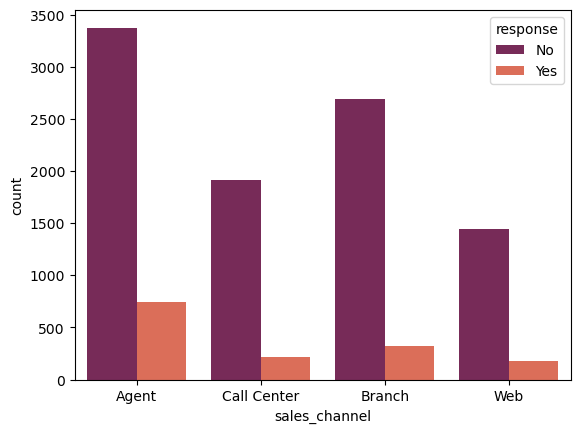

In [35]:
# Show a plot of the response rate by the sales channel.
sns.countplot(x='sales_channel', hue='response', palette='rocket', data=df)
plt.show()

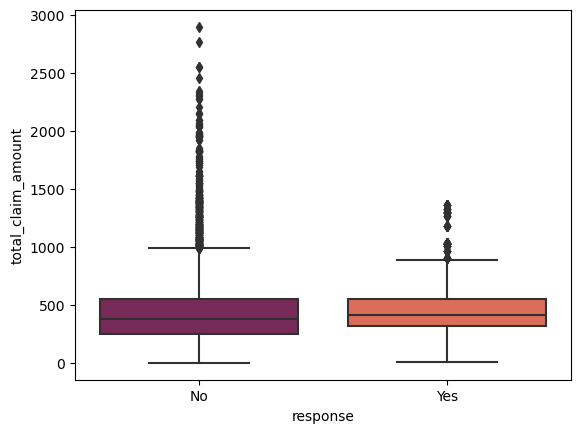

In [36]:
# Show a plot of the response rate by the total claim amount.
sns.boxplot(x='response', y='total_claim_amount', palette='rocket', data=df)
plt.show()

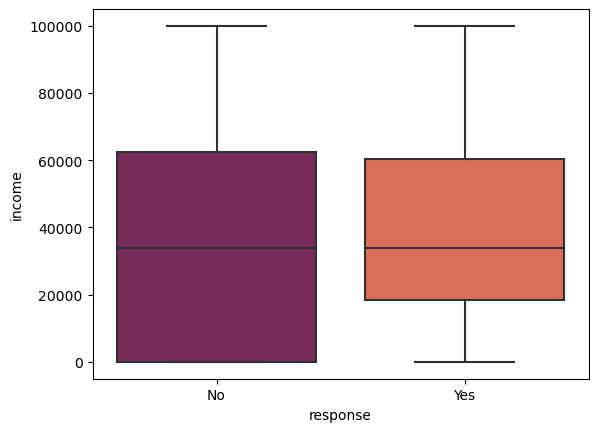

In [37]:
# Show a plot of the response rate by income.
sns.boxplot(x='response', y='income', palette='rocket', data=df)
plt.show()

# Customer Analysis | 4

In [38]:
# Check the data types of the columns. Get the numeric data into dataframe called numerical 
# and categorical columns in a dataframe called categoricals. 
# (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

cat_data = df.select_dtypes(np.object)
num_data = df.select_dtypes(np.number)

/var/folders/j6/kvk2s4n944s9vbfhkthwt40w0000gn/T/ipykernel_26678/2463070616.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_data = df.select_dtypes(np.object)


In [39]:
num_data.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1


#### Check the normality of the numerical variables visually

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


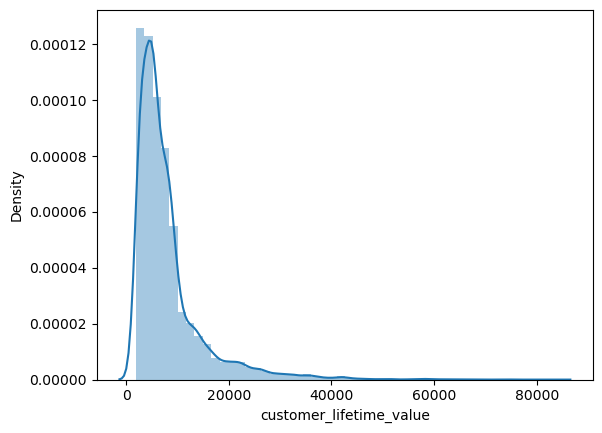

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


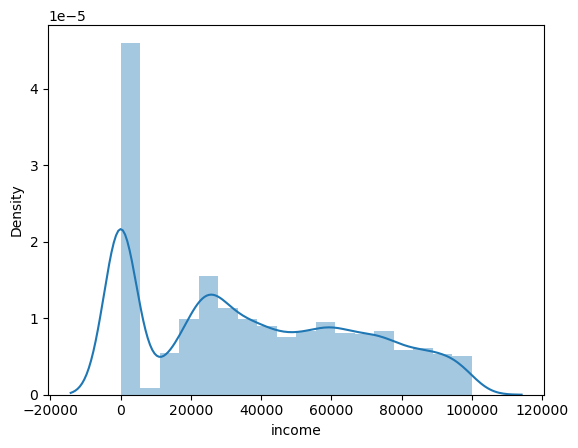

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


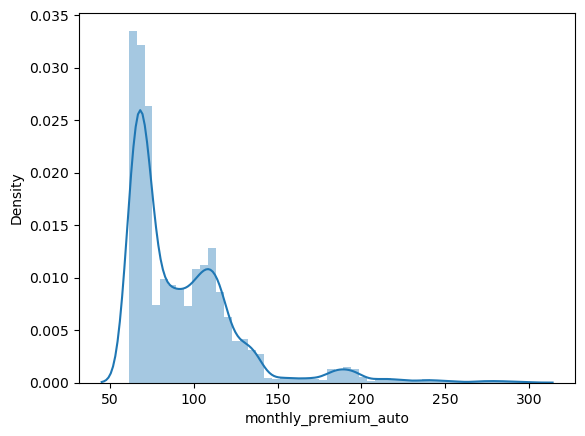

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


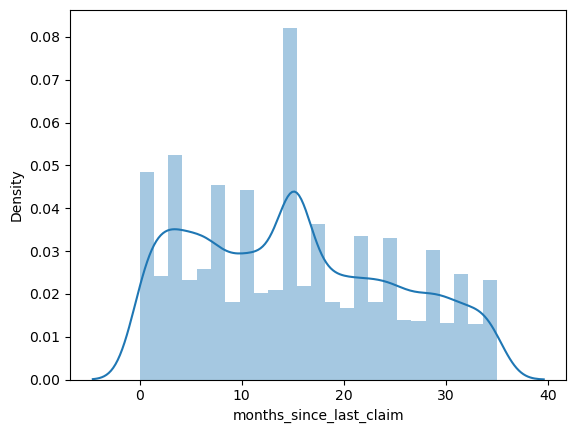

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


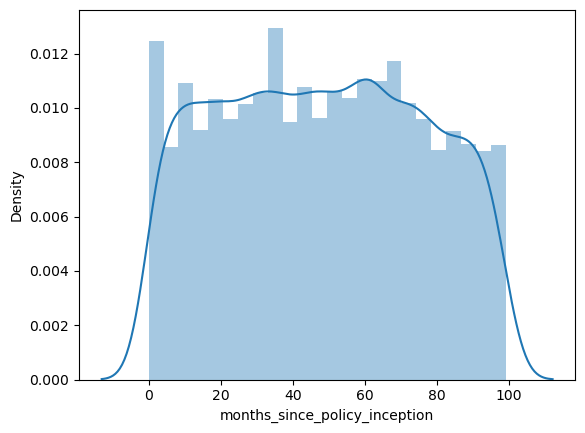

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


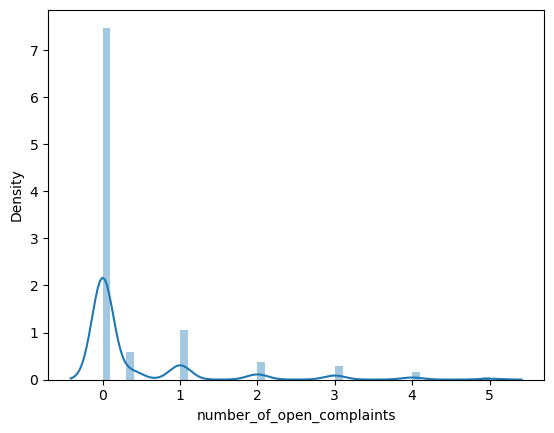

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


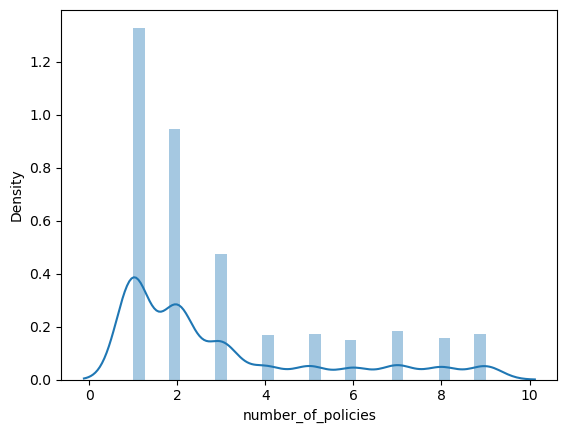

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


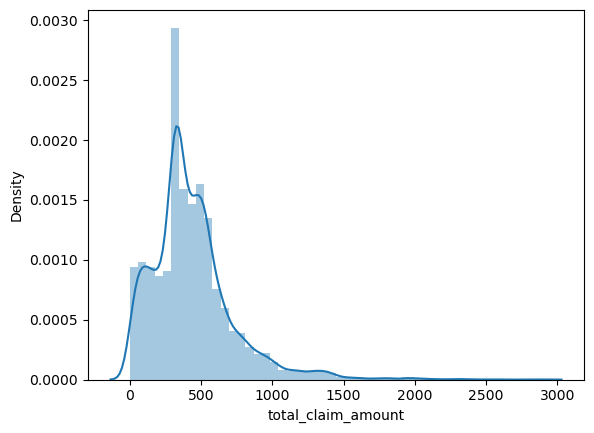

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


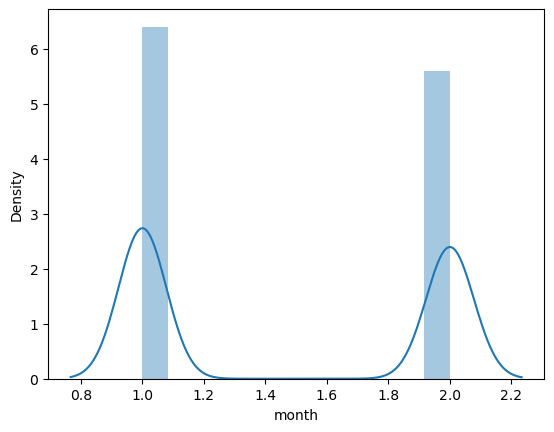

In [40]:
# 1 - Use seaborn library to construct distribution plots for the numerical variables
for col in num_data:
    sns.distplot(num_data[col])
    plt.show()

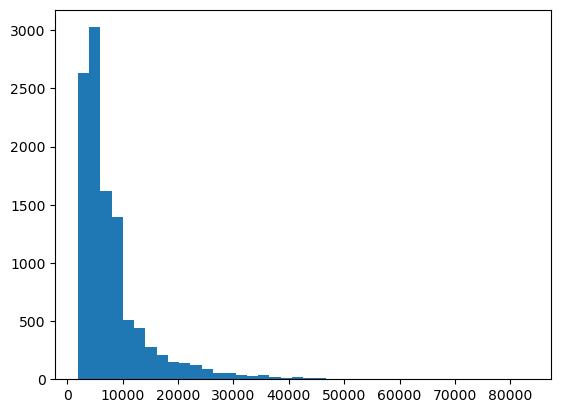

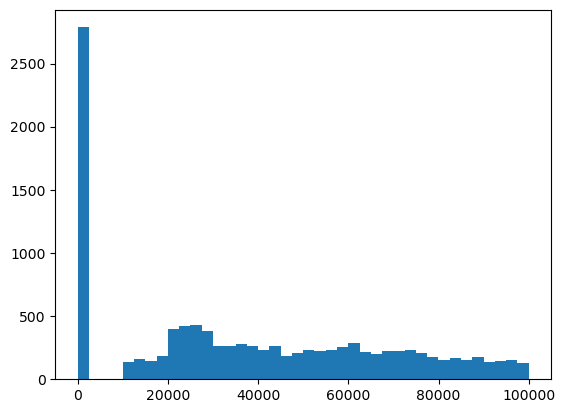

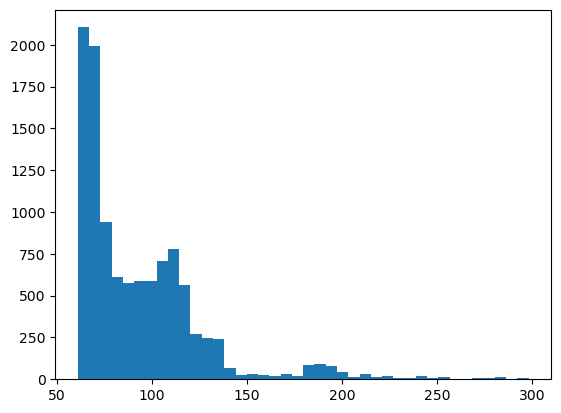

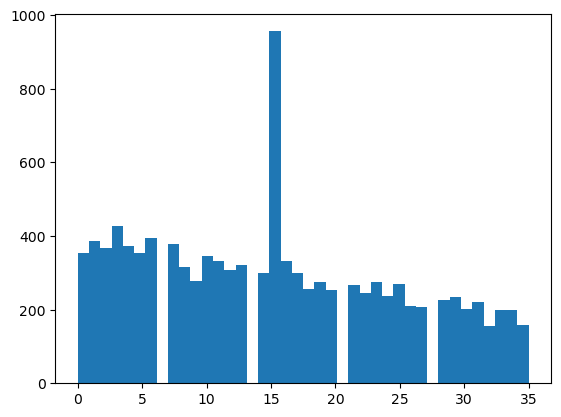

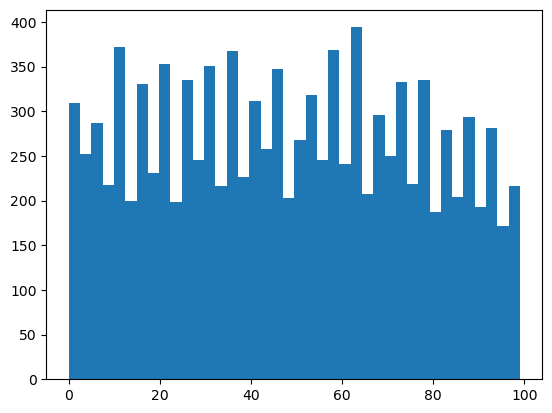

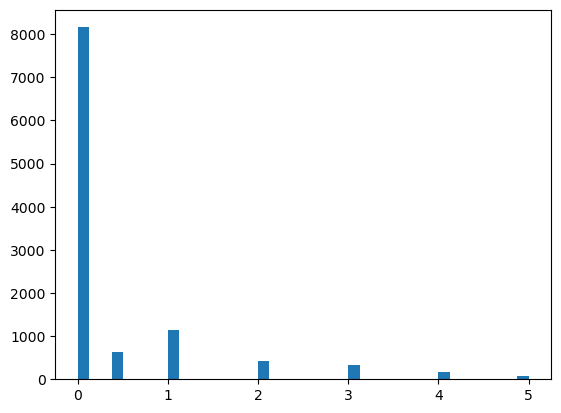

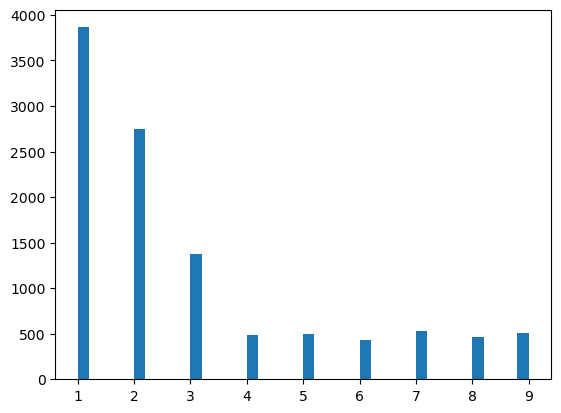

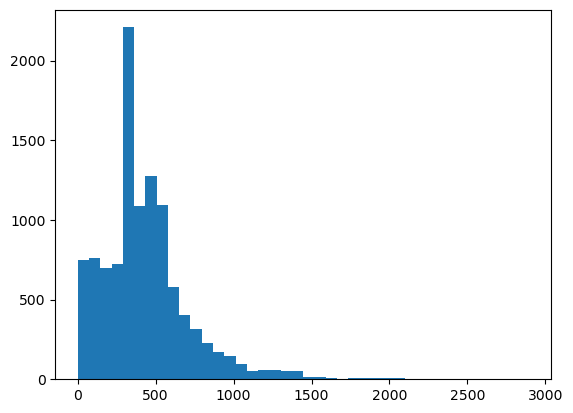

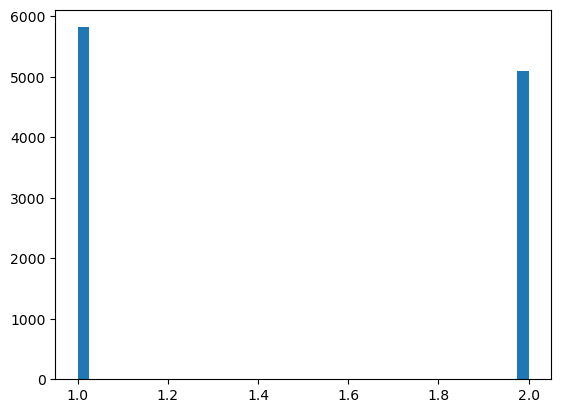

In [41]:
# 2 - Use Matplotlib to construct histograms
for col in num_data:
    plt.hist(num_data[col], bins=40)
    plt.show()

In [42]:
# 3 - DoES the distributions for different numerical variables look like a normal distribution?
# The majority of the distributions don't look exaclty like a normal distribution, as they are mainly 
# skewed to the right. In some cases there are some peaks, which make the distributions look less "normal".

#### Multicollinearity

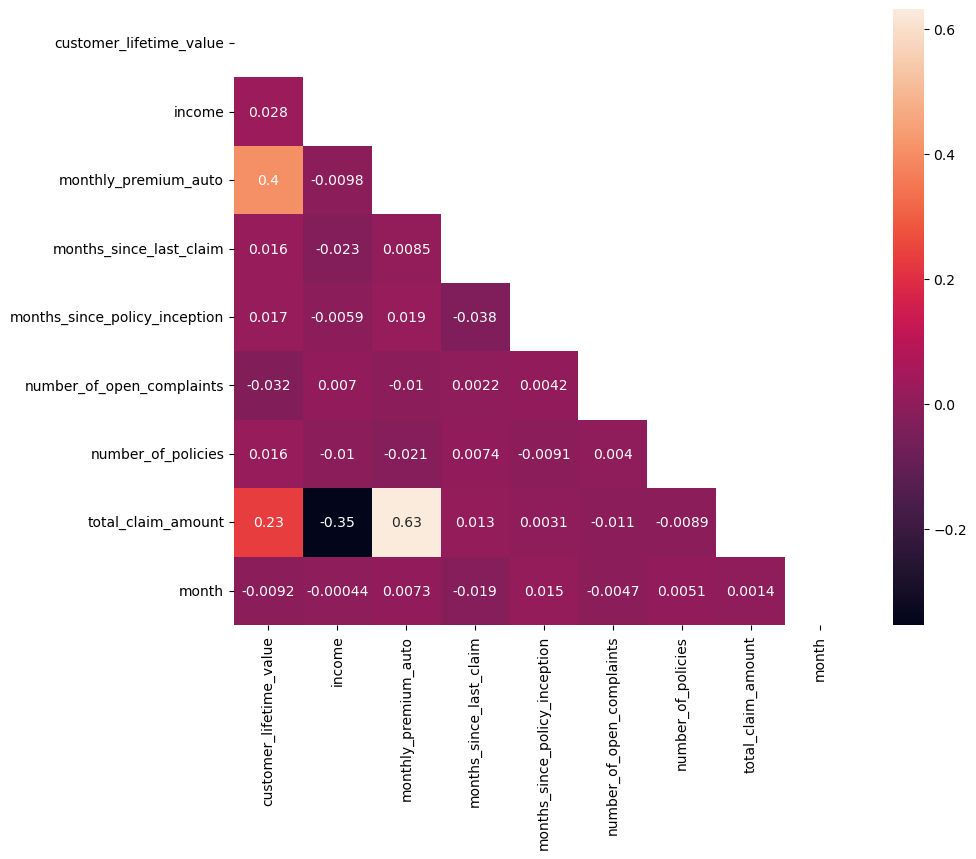

In [43]:
corr_data = df.select_dtypes([np.number])
correlations_matrix = corr_data.corr()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [44]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap. 
# If there is no pair of features that have a high correlation, then do not drop any features

Didn't drop any features, as there are no features having a correlation higher than 0.9 between each other.

# Customer Analysis | 5

#### Remove Outliers

In [45]:
for col in num_data:
    z_score = np.abs(num_data[col] - num_data[col].mean()) / num_data[col].std()
    num_data = num_data[z_score < 3]

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


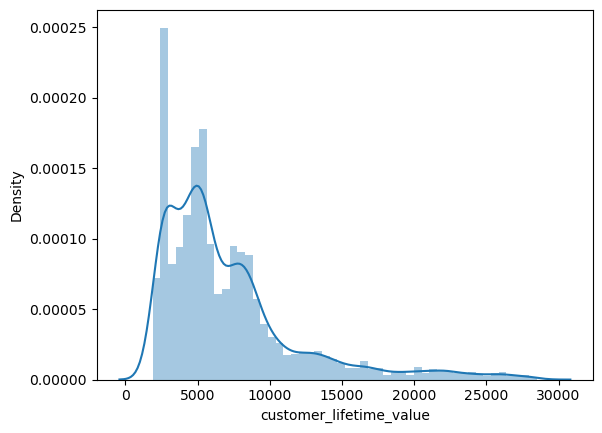

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


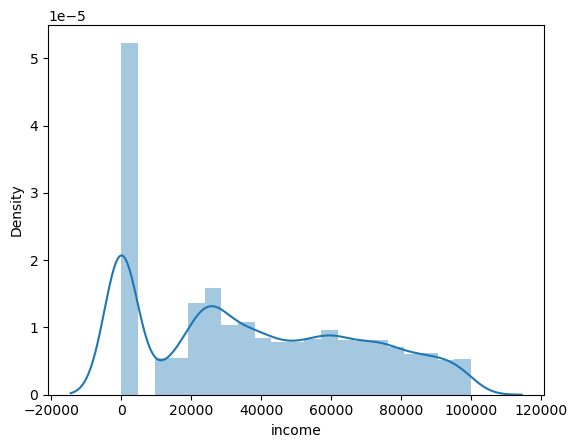

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


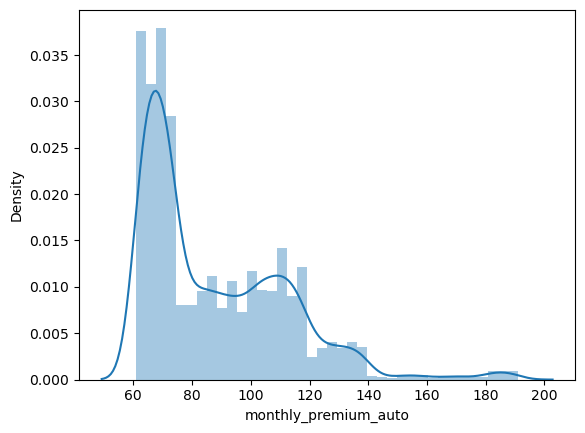

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


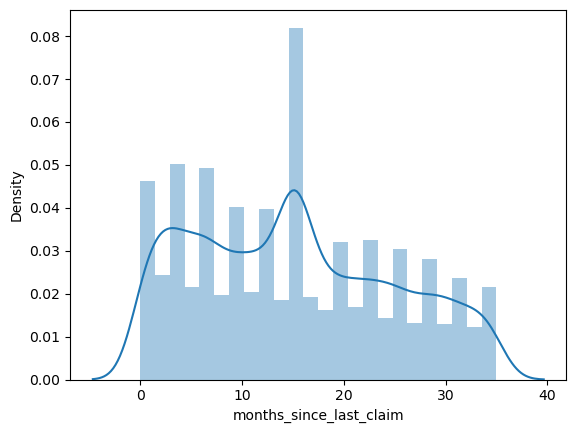

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


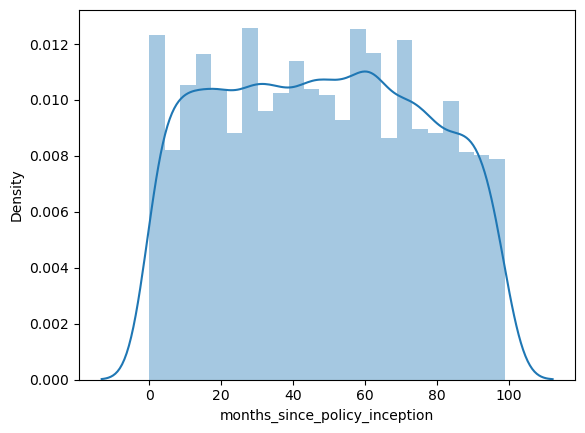

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


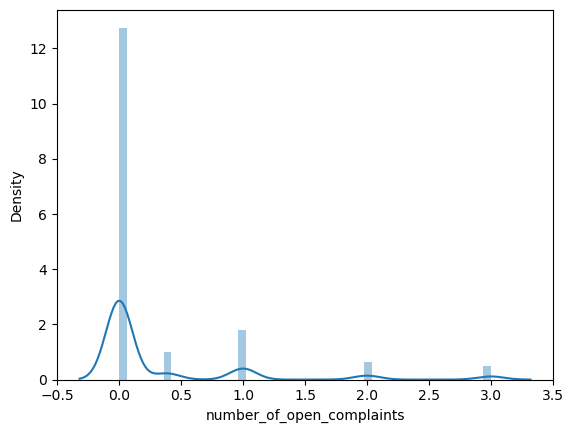

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


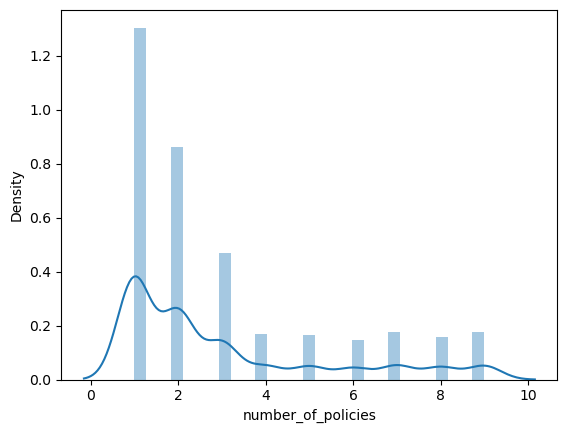

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


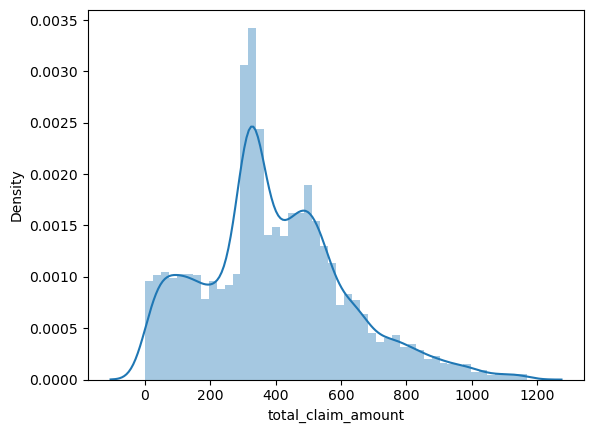

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


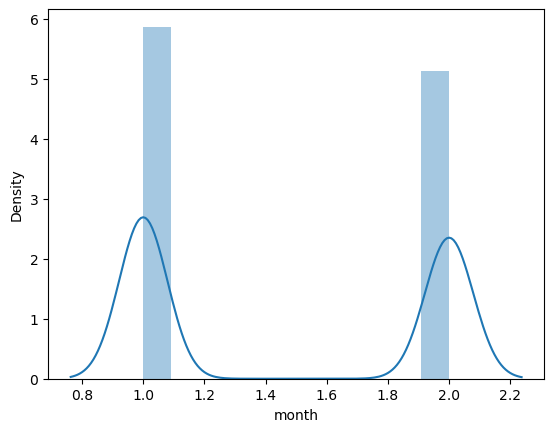

In [46]:
# Checking
for col in num_data:
    sns.distplot(num_data[col])
    plt.show()

#### X-y split

In [47]:
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Selecting numerical columns
X_num = X.select_dtypes(include = np.number)

# Dropping Discrete Columns
discrete_cols = ['number_of_open_complaints', 'number_of_policies', 'months_since_last_claim', 'months_since_policy_inception', 'month']

X_num = X_num.drop(discrete_cols, axis=1)
X_num

,customer_lifetime_value,income,monthly_premium_auto
0,4809.216960,48029,61
1,2228.525238,0,64
2,14947.917300,22139,100
3,22332.439460,49078,97
4,9025.067525,23675,117
...,...,...,...
10905,15563.369440,0,253
10906,5259.444853,61146,65
10907,23893.304100,39837,201
10908,11971.977650,64195,158


In [50]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized

array([[-0.46610505,  0.34563485, -0.93481904],
       [-0.84094593, -1.23646244, -0.84771343],
       [ 1.00652314, -0.50719362,  0.19755381],
       ...,
       [ 2.30582467,  0.07578661,  3.13010912],
       [ 0.5742732 ,  0.87815031,  1.88159547],
       [-0.16859268, -1.23646244,  0.22658901]])

In [51]:
x_standardized.shape

(10910, 3)

In [52]:
pd.DataFrame(x_standardized)

,0,1,2
0,-0.466105,0.345635,-0.934819
1,-0.840946,-1.236462,-0.847713
2,1.006523,-0.507194,0.197554
3,2.079112,0.380189,0.110448
4,0.146240,-0.456597,0.691152
...,...,...,...
10905,1.095916,-1.236462,4.639940
10906,-0.400710,0.777715,-0.818678
10907,2.305825,0.075787,3.130109
10908,0.574273,0.878150,1.881595


## Customer Analysis | 6

#### OneHot Encoder

In [53]:
from sklearn.preprocessing import OneHotEncoder

# Separate Cat variables
X_cat = X.select_dtypes('object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

In [54]:
# put the data back together
X = np.concatenate([X_num, encoded], axis=1)

In [55]:
# Do train test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Run first model
from sklearn.linear_model import LinearRegression

model = LinearRegression() 
model.fit(X_train,y_train)

LinearRegression()

In [57]:
# Predict 
predictions = model.predict(X_test)

In [58]:
# See the scores
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_absolute_error(y_test, predictions)

(0.7971545889069487, 129.54683019182323, 78.47829634210495)

/Users/mmacor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_claim_amount'>

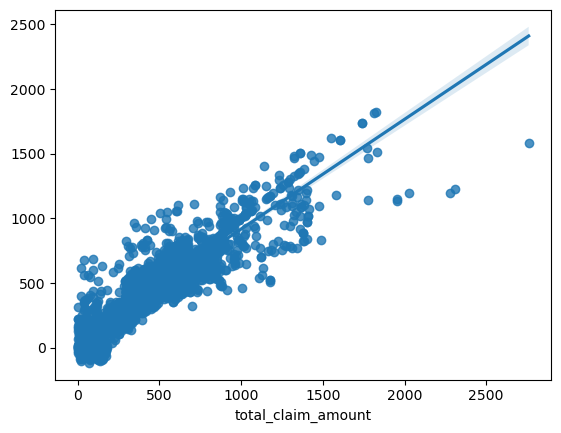

In [61]:

sns.regplot(y_test, predictions)